Project: Exploratory Data Analysis of Confirmed ExoplanetsFocus: Habitability Indicators and Planetary Physical PropertiesAuthor: Júllya Gabrielly
Field: Astroinformatics / Data Science
Status: In Progress (Research Phase)
1. IntroductionThis notebook performs a systematic investigation of physical parameters from confirmed exoplanets. The goal is to understand how planetary characteristics (mass, radius, and temperature) correlate with their host stars and identify patterns that suggest potential habitability.
2. Scientific ObjectivesData Wrangling: Clean and filter the NASA Exoplanet Archive for high-confidence detections.
Correlation Analysis: Explore the relationship between planetary mass and radius (Composition analysis).
Habitability Mapping: Identify planets located within the theoretical Habitable Zone based on equilibrium temperature ($T_{eq}$).
Performance: Implement numerical calculations for planetary density and surface gravity.
3. DatasetSource: NASA Exoplanet Archive
Tech StackLanguage: Python
Libraries: Pandas, NumPy, Matplotlib.
Future Integration: C++ modules for intensive physical calculations.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(
    "../data/exoplanets_raw.csv",
    engine="python",
    on_bad_lines="skip"
)
df.head()


,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu
0,# Mon Feb 2 15:15:21 2026
1,#
2,# User preference: *
3,#
4,# COLUMN pl_name: Planet Name


Data Loading Challenges: "Due to the large file size and formatting inconsistencies in the raw CSV, the standard parser encountered errors. To resolve this, I implemented the Python engine and configured the environment to skip malformed lines (on_bad_lines='skip'), ensuring a stable data pipeline for analysis."

In [7]:

df.tail()


,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu
36,# COLUMN st_mass: Stellar Mass [Solar m...
37,# COLUMN st_masserr1: Stellar Mass Upper Un...
38,# COLUMN st_masserr2: Stellar Mass Lower Un...
39,# COLUMN st_masslim: Stellar Mass Limit Flag
40,#


In [9]:
df.info()
#file informations


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   # This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu  41 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


In [32]:
df.describe()

,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu
count,41
unique,39
top,#
freq,3


In [11]:
df = pd.read_csv('../data/exoplanets_raw.csv', comment='#')

In [12]:
df.head()
df.columns

Index(['pl_name', 'hostname', 'discoverymethod', 'disc_year', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_masselim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass',
       'st_masserr1', 'st_masserr2', 'st_masslim'],
      dtype='object')

In [ ]:
df['discoverymethod'].value_counts()#shows how many times the methods appear.

discoverymethod
Transit                          35338
Radial Velocity                   2775
Microlensing                       775
Imaging                            166
Transit Timing Variations          159
Eclipse Timing Variations           26
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           6
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64

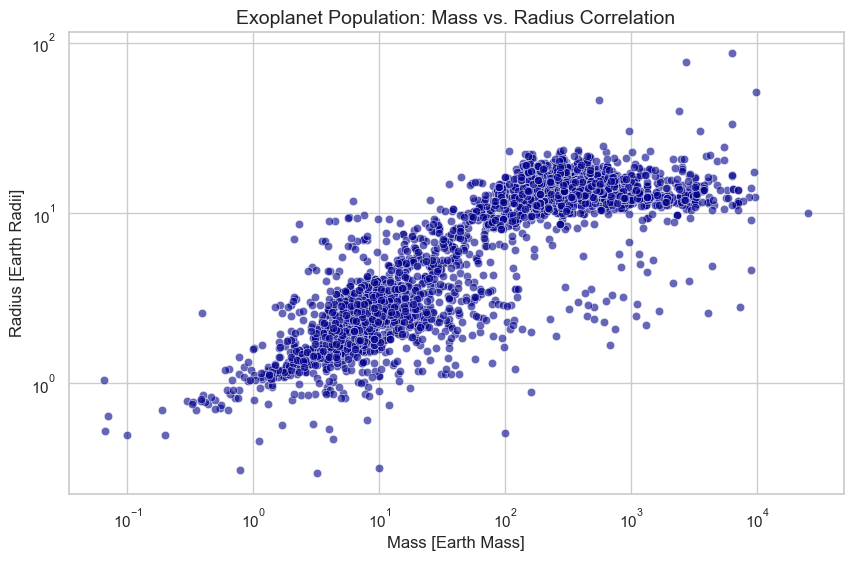

In [20]:
# Defining the visual style 
sns.set_theme(style="whitegrid")

# Creating the chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pl_masse', y='pl_rade', alpha=0.6, color='darkblue')

# Configuring logarithmic scales
plt.xscale('log')
plt.yscale('log')

plt.title('Exoplanet Population: Mass vs. Radius Correlation', fontsize=14)
plt.xlabel('Mass [Earth Mass]', fontsize=12)
plt.ylabel('Radius [Earth Radii]', fontsize=12)

plt.show()

Mass-Radius Relation: The scatter plot confirms that planetary radius increases with mass, following a power-law distribution typical of exoplanetary populations.

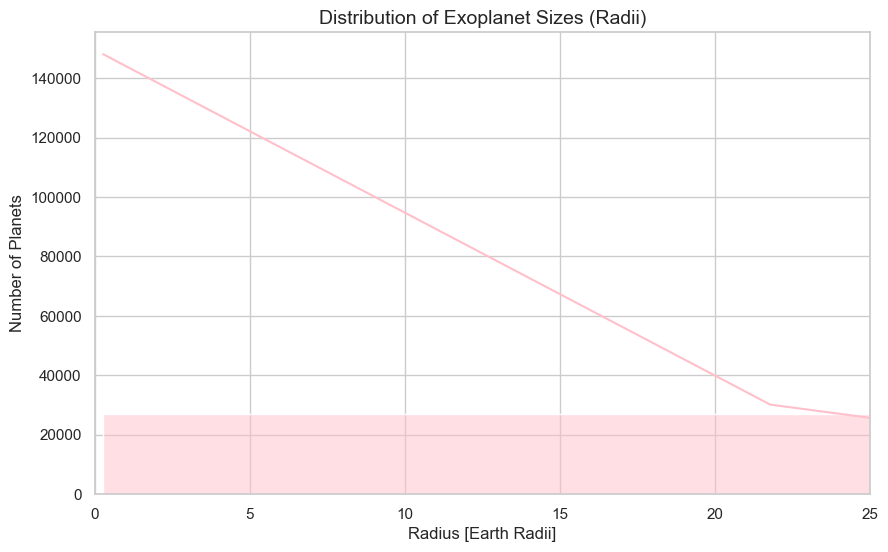

In [21]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# bins=30 divide os dados em 30 barras para vermos os detalhes
sns.histplot(data=df, x='pl_rade', bins=30, kde=True, color='pink')

# Since most planets are small, I will focus my view on the smaller radii (0 to 20).
plt.xlim(0, 25) 

plt.title('Distribution of Exoplanet Sizes (Radii)', fontsize=14)
plt.xlabel('Radius [Earth Radii]', fontsize=12)
plt.ylabel('Number of Planets', fontsize=12)

plt.show()

Discovery Bias: The histogram shows a steep decline in frequency as radius increases. This suggests that while small planets are more numerous in our dataset, gas giants (larger radii) are rarer or follow different formation patterns.